# Exploratory Data Analysis (EDA)
## Consumer Purchase Prediction

This notebook performs comprehensive exploratory data analysis on the consumer behavior dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('../../data/Advertisement.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")


Dataset loaded successfully!
Shape: (400, 5)


## 1. Data Overview


In [3]:
# First few rows
df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Statistical summary
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)


Missing Values:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Missing Values Percentage:
User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64


In [7]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


## 2. Target Variable Analysis


Purchased Distribution:
Purchased
0    257
1    143
Name: count, dtype: int64

Percentage:
Purchased
0    64.25
1    35.75
Name: count, dtype: float64


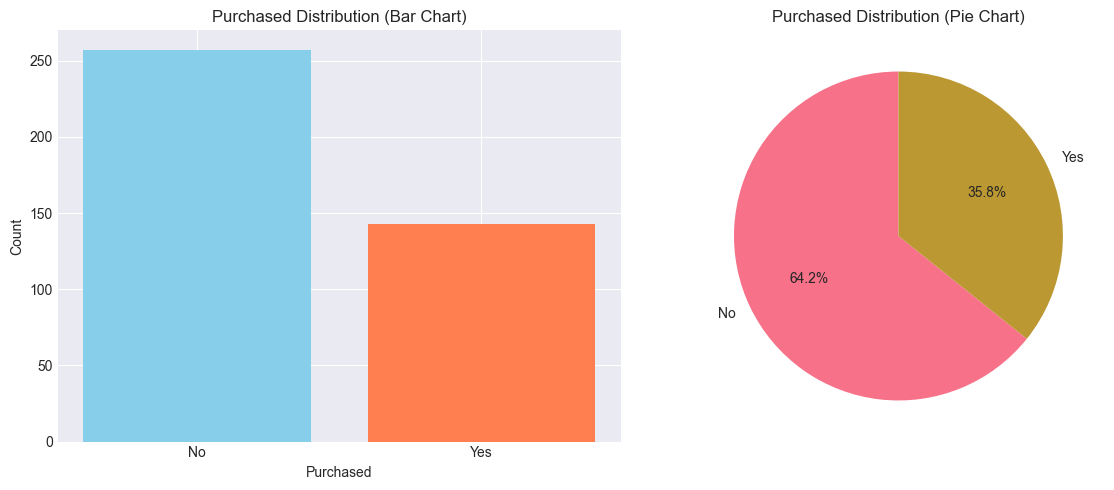

In [8]:
# Target variable distribution
purchased_counts = df['Purchased'].value_counts()
print("Purchased Distribution:")
print(purchased_counts)
print(f"\nPercentage:")
print((purchased_counts / len(df)) * 100)

# Visualize target variable
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(purchased_counts.index, purchased_counts.values, color=['skyblue', 'coral'])
axes[0].set_xlabel('Purchased')
axes[0].set_ylabel('Count')
axes[0].set_title('Purchased Distribution (Bar Chart)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

axes[1].pie(purchased_counts.values, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Purchased Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


## 3. Numerical Variables Analysis


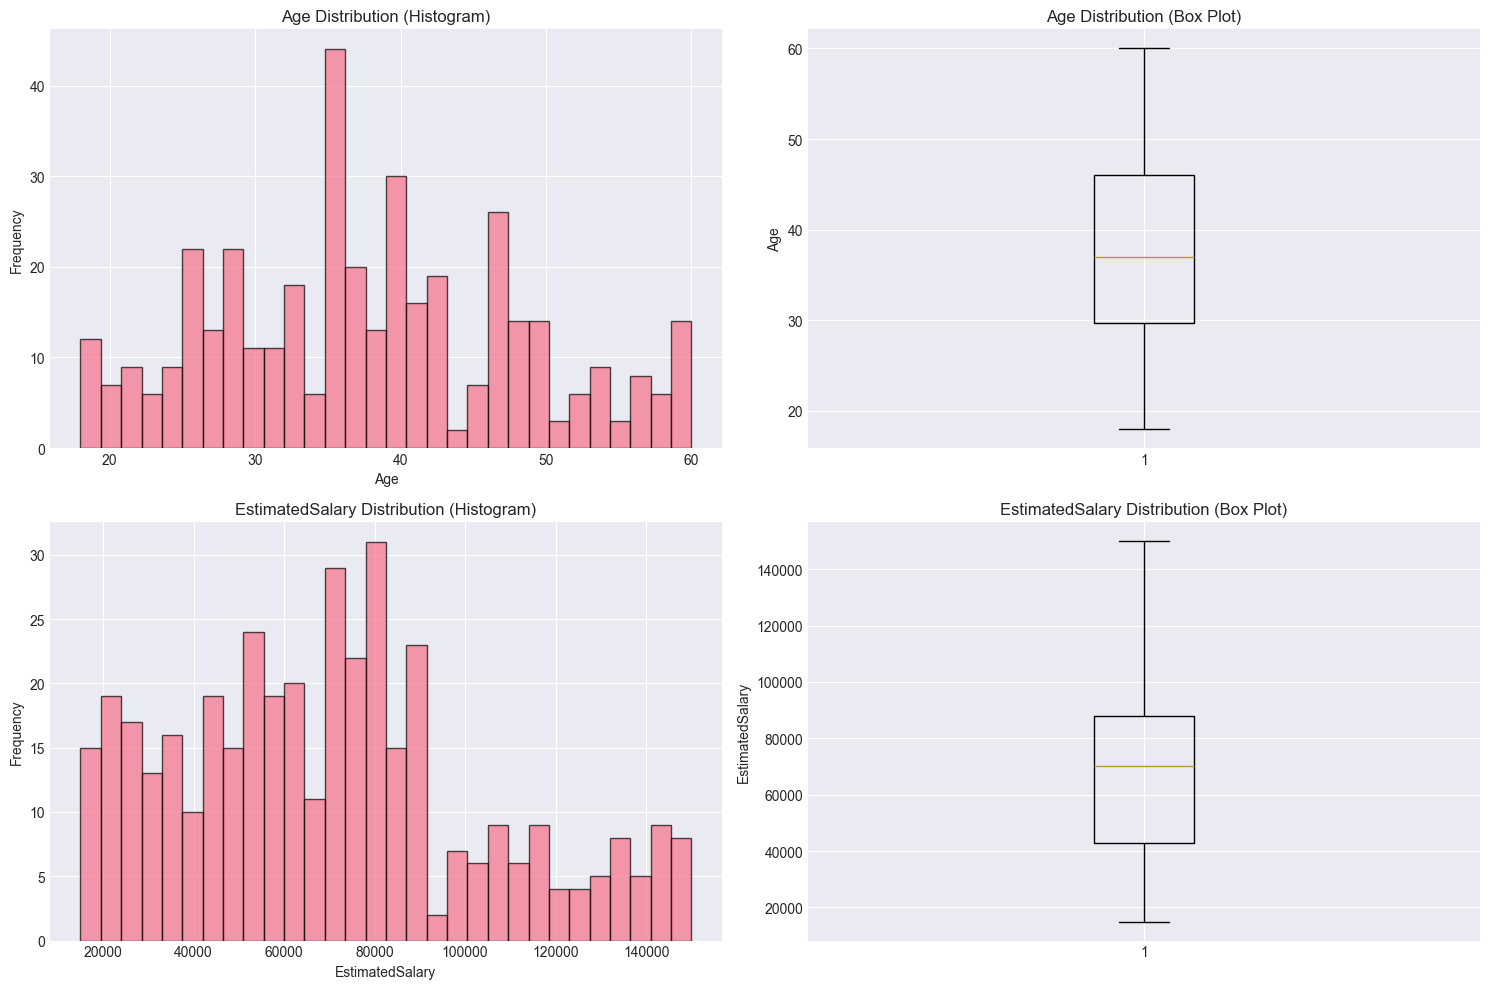

In [9]:
# Distribution of numerical variables
numeric_cols = ['Age', 'EstimatedSalary']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, col in enumerate(numeric_cols):
    # Histogram
    axes[idx, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{col} Distribution (Histogram)')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[idx, 1].boxplot(df[col], vert=True)
    axes[idx, 1].set_title(f'{col} Distribution (Box Plot)')
    axes[idx, 1].set_ylabel(col)

plt.tight_layout()
plt.show()


## 4. Categorical Variables Analysis


Gender Distribution:
Gender
Female    204
Male      196
Name: count, dtype: int64

Percentage:
Gender
Female    51.0
Male      49.0
Name: count, dtype: float64


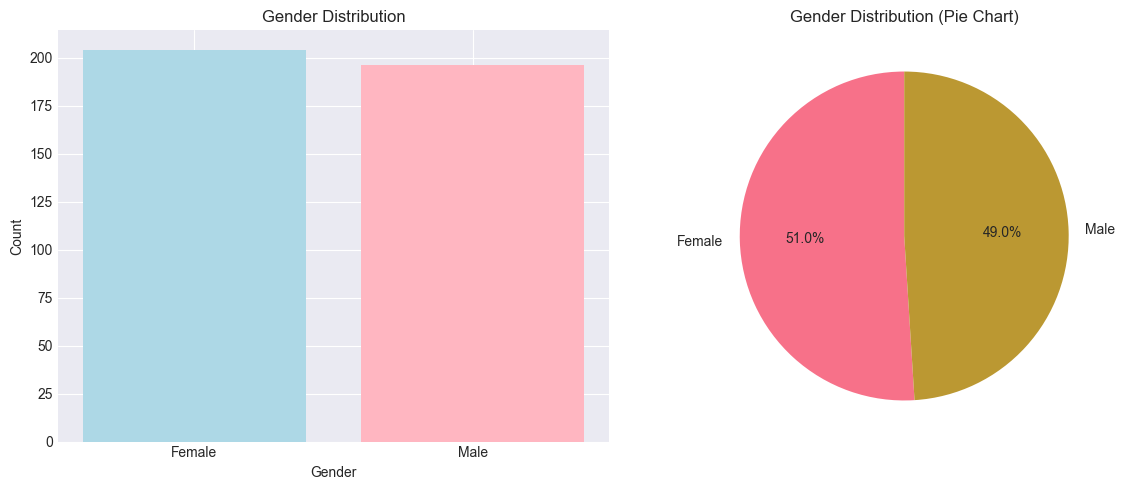

In [10]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
print("Gender Distribution:")
print(gender_counts)
print(f"\nPercentage:")
print((gender_counts / len(df)) * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink'])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Gender Distribution')

axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gender Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


## 5. Relationship Analysis


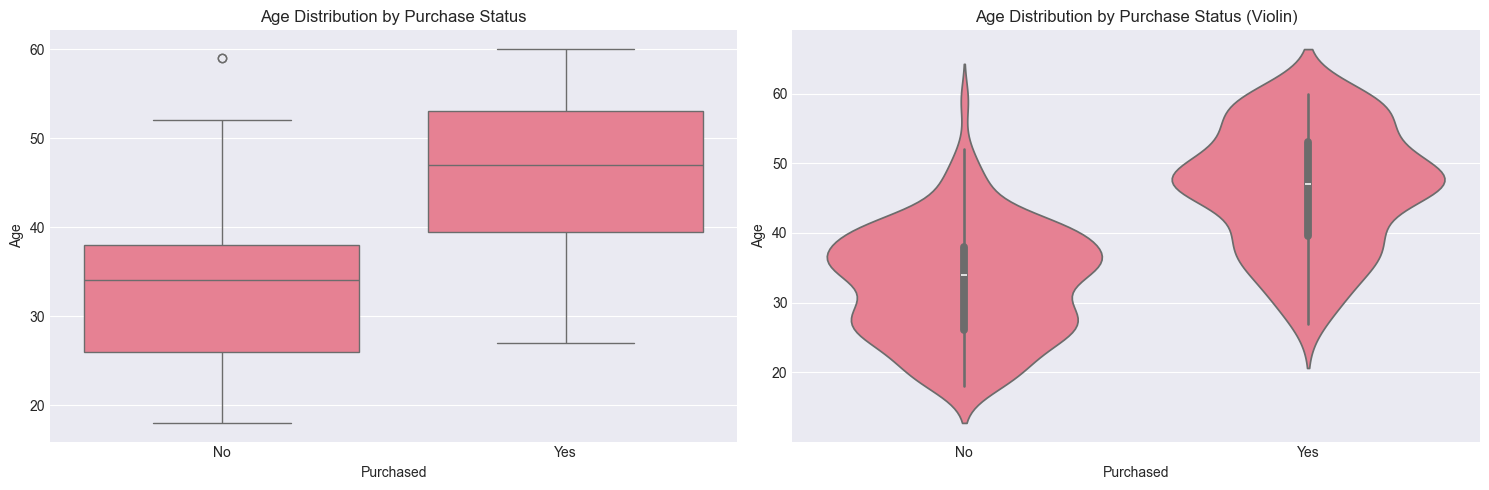

In [11]:
# Age vs Purchased
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='Purchased', y='Age', ax=axes[0])
axes[0].set_title('Age Distribution by Purchase Status')
axes[0].set_xticklabels(['No', 'Yes'])

sns.violinplot(data=df, x='Purchased', y='Age', ax=axes[1])
axes[1].set_title('Age Distribution by Purchase Status (Violin)')
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


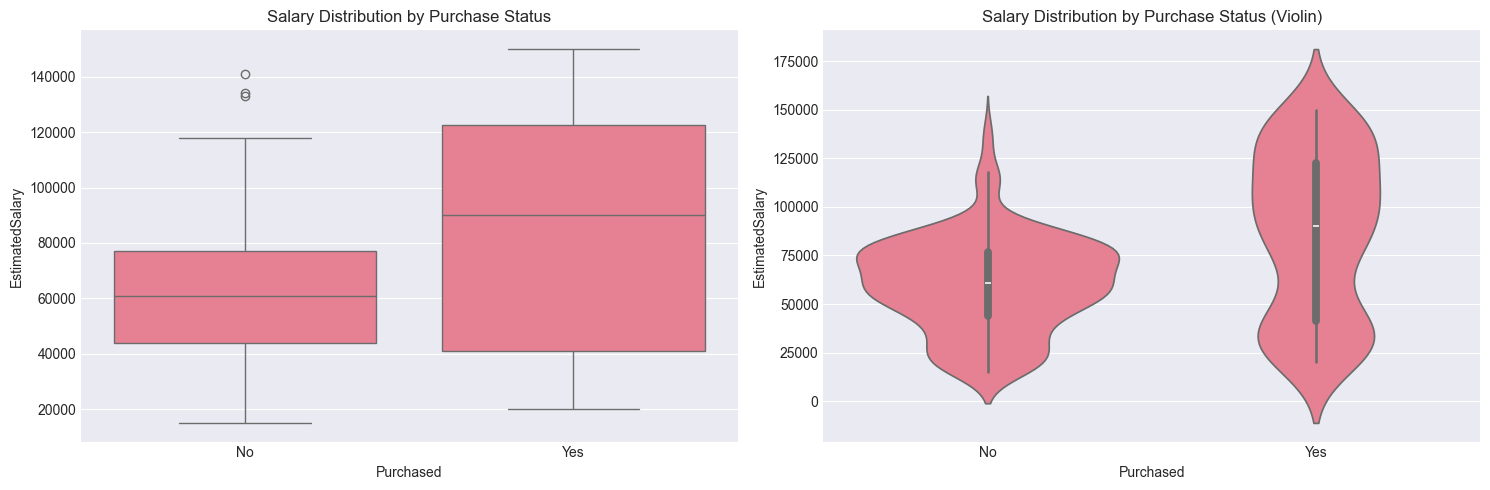

In [12]:
# Salary vs Purchased
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, x='Purchased', y='EstimatedSalary', ax=axes[0])
axes[0].set_title('Salary Distribution by Purchase Status')
axes[0].set_xticklabels(['No', 'Yes'])

sns.violinplot(data=df, x='Purchased', y='EstimatedSalary', ax=axes[1])
axes[1].set_title('Salary Distribution by Purchase Status (Violin)')
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


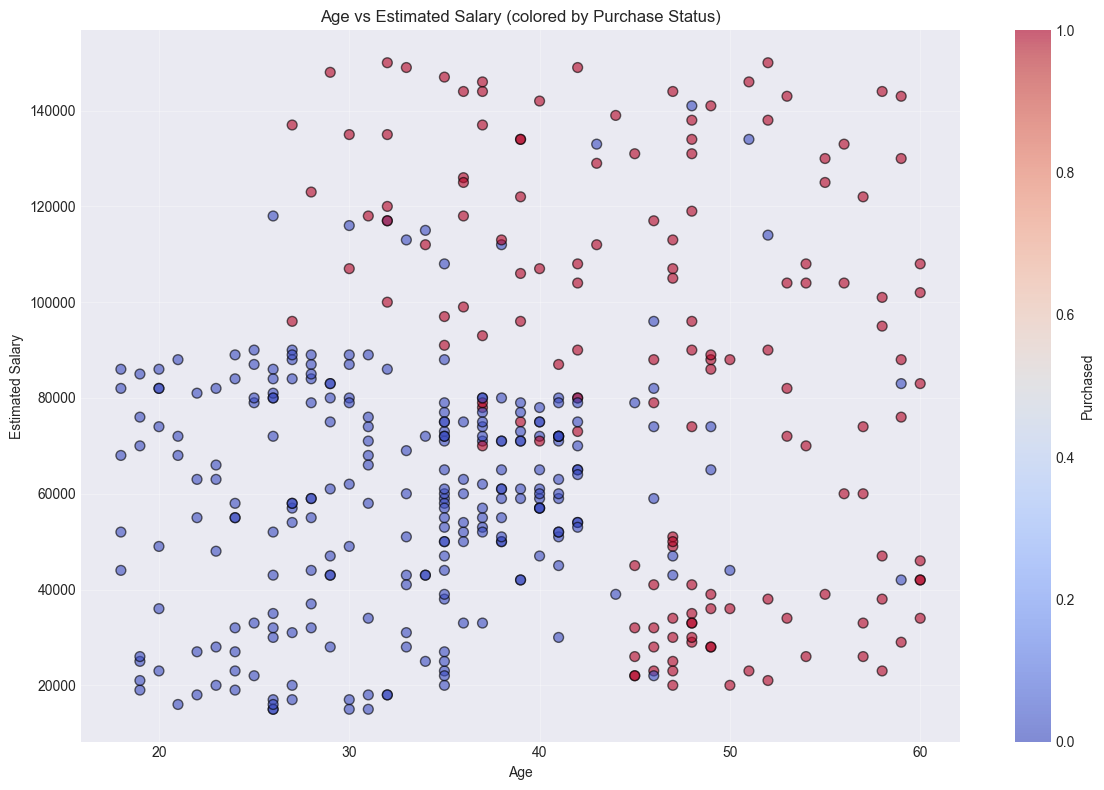

In [13]:
# Age vs Salary colored by Purchased
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Age'], df['EstimatedSalary'], 
                     c=df['Purchased'], cmap='coolwarm', 
                     alpha=0.6, s=50, edgecolors='black')
plt.colorbar(scatter, label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary (colored by Purchase Status)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


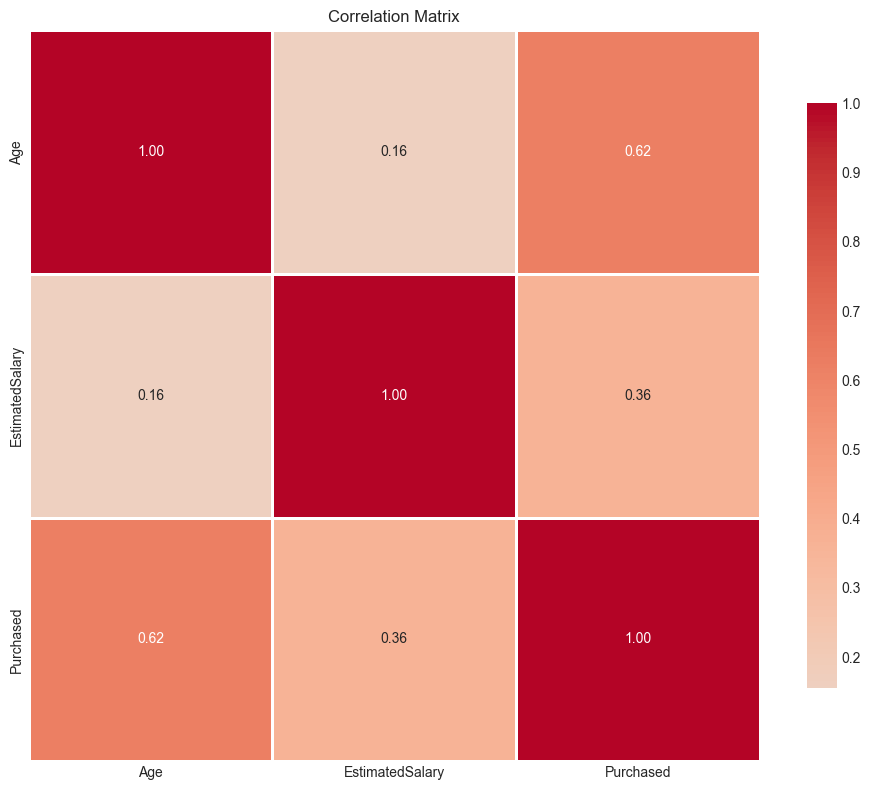


Correlation with Purchased:
Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Name: Purchased, dtype: float64


In [14]:
# Correlation matrix
numeric_df = df[['Age', 'EstimatedSalary', 'Purchased']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation with Purchased:")
print(correlation_matrix['Purchased'].sort_values(ascending=False))
